In [2]:
#Altura
#Atletismo lo podemos comparar desde el principio de los tiempos
#El resto de disciplinas desde 1960

#Peso
#Desde el 1960 hasta 2016

#Edad
#Puedo hacer desde el principio

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.offline as pyo
import matplotlib

In [4]:
repetidos_total_2=pd.read_csv("repetidos_total_2.csv")

In [5]:
repetidos_total_2

,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
234507,ZWICKER Martin Detlef,M,34.0,176.0,NaN,Germany,GER,2021,Tokyo,Hockey,NaN,NaN
234508,ZWOLINSKA Klaudia,F,23.0,NaN,NaN,Poland,POL,2021,Tokyo,Canoeing,Canoe Slalom,NaN
234509,ZYKOVA Yulia,F,26.0,NaN,NaN,ROC,ROC,2021,Tokyo,Shooting,50m Rifle 3 Positions Women,Silver Medal
234510,ZYUZINA Ekaterina,F,25.0,NaN,NaN,ROC,ROC,2021,Tokyo,Sailing,NaN,NaN


In [6]:
solo_atletismo=repetidos_total_2[repetidos_total_2["Sport"]=="Athletics"]

In [7]:
media_altura_atletismo=solo_atletismo.groupby("Year")["Height"].mean()

In [8]:
media_altura_atletismo

Year
1896    174.875000
1900    178.578947
1904    178.227273
1906    180.352941
1908    178.305994
1912    178.129032
1920    177.161194
1924    176.324257
1928    176.472505
1932    176.091765
1936    177.456110
1948    177.423290
1952    176.394947
1956    176.184132
1960    176.420245
1964    175.876506
1968    176.355755
1972    175.936145
1976    176.658613
1980    176.641509
1984    175.800367
1988    175.551587
1992    176.087613
1996    176.476684
2000    176.537860
2004    176.301748
2008    176.038164
2012    176.095578
2016    175.207140
2021    176.138889
Name: Height, dtype: float64

In [9]:
fig = go.Figure(
    data=go.Scatter(x=media_altura_atletismo.index, y=media_altura_atletismo),
    layout=go.Layout(title="Height Mean on Athletics", xaxis_title="Years", yaxis_title="Height",yaxis_range=[150,200])
)

fig.show()

In [10]:
desde_1960=[1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2021]

In [11]:
alturas_desde_1960=repetidos_total_2[repetidos_total_2["Year"].isin(desde_1960)]

In [12]:
media_altura_desde_1960=alturas_desde_1960.groupby("Year")["Height"].mean()

In [13]:
media_altura_desde_1960

Year
1960    173.310287
1964    173.690848
1968    174.087484
1972    174.745758
1976    175.053724
1980    175.634392
1984    175.573516
1988    175.683249
1992    176.382283
1996    175.895121
2000    176.089721
2004    175.972850
2008    176.211062
2012    176.262469
2016    176.034266
2021    178.161967
Name: Height, dtype: float64

In [14]:
fig = go.Figure(
    data=go.Scatter(x=media_altura_desde_1960.index, y=media_altura_desde_1960),
    layout=go.Layout(title="Height Mean on Olympics since 1960", xaxis_title="Years", yaxis_title="Height",yaxis_range=[150,200])
)

fig.show()

In [15]:
# Crear los dos gráficos
fig1 = go.Figure(data=go.Scatter(x=media_altura_atletismo.index, y=media_altura_atletismo),
                 layout=go.Layout(title="Height Mean on Athletics", xaxis_title="Years",
                                  yaxis_title="Height",showlegend=False))

fig2 = go.Figure(data=go.Scatter(x=media_altura_desde_1960.index, y=media_altura_desde_1960),
                 layout=go.Layout(title="Height Mean on Olympics since 1960", xaxis_title="Years",
                                  yaxis_title="Height",showlegend=False))

fig2.update_layout(yaxis_range=[150, 200])
# Crear la matriz de subgráficos
fig = make_subplots(rows=1, cols=2)


# Agregar cada gráfico a un subgráfico diferente
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2,)
#fig.update_yaxes(range=[150, 200], row=1, col=1)

# Personalizar la apariencia de la matriz de subgráficos
fig.update_layout(title='Height Comparison', height=400, width=1200)
#fig.update_layout(yaxis_range=[150,200])
fig.update_xaxes(title_text="Height Mean on Athletics", row=1, col=1)
fig.update_xaxes(title_text="Height Mean on Olympics since 1960",row=1,col=2)
fig.update_yaxes(range=(160,190))


fig.update_layout(showlegend=False)



# Guardar la figura como un archivo HTML
pyo.plot(fig, filename='Height Comparison.html')

'Height Comparison.html'

In [16]:
alturas_2016=repetidos_total_2[repetidos_total_2["Year"]==2016]["Height"].value_counts()

In [17]:
alturas_2016

170.0    743
180.0    715
175.0    632
178.0    564
173.0    514
        ... 
215.0      2
212.0      1
218.0      1
214.0      1
217.0      1
Name: Height, Length: 78, dtype: int64

In [18]:
alturas_2016 = alturas_2016.reset_index().rename(columns={'index': 'Height', 'Height': 'Count'})
alturas_2016

,Height,Count
0,170.0,743
1,180.0,715
2,175.0,632
3,178.0,564
4,173.0,514
...,...,...
73,215.0,2
74,212.0,1
75,218.0,1
76,214.0,1


In [19]:
fig = go.Figure(data=go.Box(y=alturas_2016["Height"]))
fig.show()

In [20]:
# Crear los dos gráficos
fig1 = go.Figure(data=go.Scatter(x=media_altura_atletismo.index, y=media_altura_atletismo),
                 layout=go.Layout(title="Height Mean on Athletics", xaxis_title="Years",
                                  yaxis_title="Height",showlegend=False))

fig2 = go.Figure(data=go.Scatter(x=media_altura_desde_1960.index, y=media_altura_desde_1960),
                 layout=go.Layout(title="Height Mean on Olympics since 1960", xaxis_title="Years",
                                  yaxis_title="Height",showlegend=False))

fig3 = go.Figure(data=go.Box(y=alturas_2016["Height"]))

fig2.update_layout(yaxis_range=[150, 200])
# Crear la matriz de subgráficos
fig = make_subplots(rows=2, cols=2)


# Agregar cada gráfico a un subgráfico diferente
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=2, col=1)
fig.update_yaxes(range=[120, 230], row=2, col=1)

# Personalizar la apariencia de la matriz de subgráficos
fig.update_layout(title='Physical Comparation', height=600, width=1200)
#fig.update_layout(yaxis_range=[150,200])
fig.update_xaxes(title_text="Height Mean on Athletics", row=1, col=1)
fig.update_xaxes(title_text="Height Mean on Olympics since 1960",row=1,col=2)
fig.update_yaxes(range=(160,190))
fig3.update_layout(yaxis_range=[120,220])


fig.update_layout(showlegend=False)



# Guardar la figura como un archivo HTML
pyo.plot(fig, filename='Physical Comparation.html')

'Physical Comparation.html'

In [21]:
# Crear los dos gráficos
fig1 = go.Figure(data=go.Scatter(x=media_altura_atletismo.index, y=media_altura_atletismo),
                 layout=go.Layout())

fig2 = go.Figure(data=go.Scatter(x=media_altura_desde_1960.index, y=media_altura_desde_1960),
                 layout=go.Layout())

fig3 = go.Figure(data=go.Box(y=alturas_2016["Height"]),layout=go.Layout(yaxis_range=(110,220)))

fig2.update_layout(yaxis_range=[150, 200])
# Crear la matriz de subgráficos
fig = make_subplots(rows=2, cols=2)


# Agregar cada gráfico a un subgráfico diferente
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=2, col=1)


# Personalizar la apariencia de la matriz de subgráficos
fig.update_layout(title='Height Evolution', height=600, width=1200)
#fig.update_layout(yaxis_range=[150,200])
fig.update_xaxes(title_text="Height Mean on Athletics", row=1, col=1)
fig.update_xaxes(title_text="Height Mean on Olympics since 1960",row=1,col=2)
fig.update_xaxes(title_text="Height Boxplot on 2016",row=2,col=1)
fig1.update_yaxes(range=(160,190))
fig.update_yaxes(range=(160,190))
#fig3.update_yaxes(range=(120,190))


fig.update_layout(showlegend=False)



# Guardar la figura como un archivo HTML
pyo.plot(fig, filename='Height Evolution.html')

'Height Evolution.html'

In [22]:
trace1 = go.Scatter(
    x=[1, 2, 3],
    y=[4, 5, 6]
)
trace2 = go.Scatter(
    x=[20, 30, 40],
    y=[50, 60, 70],
    xaxis="x2",
    yaxis="y2"
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.7]
    ),
    xaxis2=dict(
        domain=[0.8, 1]
    ),
    yaxis2=dict(
        anchor="x2"
    )
)
fig = go.Figure(data=data, layout=layout)
fig.show()

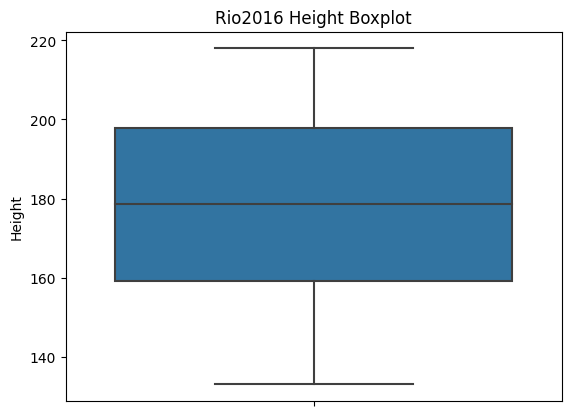

In [23]:
import seaborn as sns


sns.boxplot(y=alturas_2016["Height"] )
plt.title("Rio2016 Height Boxplot")
plt.show()

In [24]:
#alturas_60_por_año=alturas_desde_1960.groupby("Year")["Height"].value_counts()
alturas_60_por_año=alturas_desde_1960.groupby("Year")["Height"].value_counts().reset_index(name="Count")


In [25]:
alturas_60_por_año.groupby("Year")["Height"].value_counts()

Year  Height
1960  146.0     1
      147.0     1
      148.0     1
      150.0     1
      151.0     1
               ..
2021  213.0     1
      214.0     1
      215.0     1
      217.0     1
      218.0     1
Name: Height, Length: 1221, dtype: int64

In [26]:
alturas_2016 = alturas_2016.reset_index().rename(columns={'H': 'Height', 'Countt': 'Count'})
alturas_2016

,index,Height,Count
0,0,170.0,743
1,1,180.0,715
2,2,175.0,632
3,3,178.0,564
4,4,173.0,514
...,...,...,...
73,73,215.0,2
74,74,212.0,1
75,75,218.0,1
76,76,214.0,1


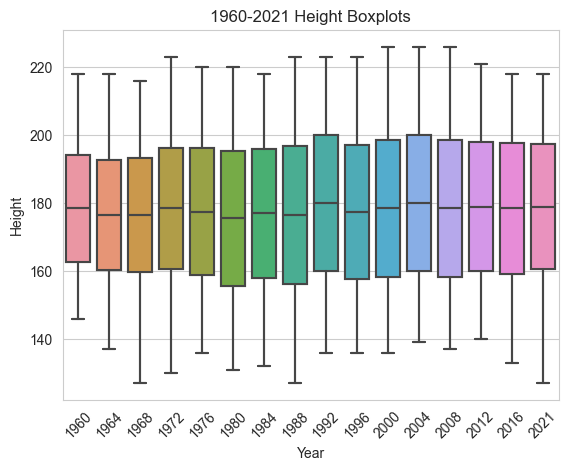

In [35]:
sns.boxplot(x="Year", y="Height", data=alturas_60_por_año)
ax = sns.boxplot(x="Year", y="Height", data=alturas_60_por_año)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("1960-2021 Height Boxplots")
sns.set_style("whitegrid")

plt.savefig("Height Evolution", transparent=True)
plt.show();


In [28]:
solo_atletismo_men=repetidos_total_2[(repetidos_total_2["Sport"]=="Athletics")&(repetidos_total_2["Sex"]=="M")]
solo_atletismo_women=repetidos_total_2[(repetidos_total_2["Sport"]=="Athletics")&(repetidos_total_2["Sex"]=="F")]
media_altura_atletismo_men=solo_atletismo_men.groupby("Year")["Height"].mean()
media_altura_atletismo_women=solo_atletismo_women.groupby("Year")["Height"].mean()

In [29]:
alturas_desde_1960_men=repetidos_total_2[(repetidos_total_2["Year"].isin(desde_1960))&(repetidos_total_2["Sex"]=="M")]
alturas_desde_1960_women=repetidos_total_2[(repetidos_total_2["Year"].isin(desde_1960))&(repetidos_total_2["Sex"]=="F")]
media_altura_desde_1960_men=alturas_desde_1960_men.groupby("Year")["Height"].mean()
media_altura_desde_1960_women=alturas_desde_1960_women.groupby("Year")["Height"].mean()

In [30]:
media_altura_desde_1960_men

Year
1960    175.494416
1964    175.737342
1968    176.486024
1972    177.302025
1976    177.859311
1980    178.530008
1984    178.538345
1988    179.067762
1992    179.859247
1996    180.133290
2000    180.704091
2004    180.891246
2008    181.253646
2012    181.633557
2016    181.547852
2021    184.398183
Name: Height, dtype: float64

In [31]:
media_altura_atletismo_men

Year
1896    174.875000
1900    178.578947
1904    178.227273
1906    180.352941
1908    178.305994
1912    178.129032
1920    177.161194
1924    176.324257
1928    177.431507
1932    177.449036
1936    178.811133
1948    179.415704
1952    178.923744
1956    178.453488
1960    178.377176
1964    178.508629
1968    178.973577
1972    178.943201
1976    180.139723
1980    179.364486
1984    179.059083
1988    179.581776
1992    180.287310
1996    181.057143
2000    181.487288
2004    181.614991
2008    181.566349
2012    181.844100
2016    180.920290
2021    182.821429
Name: Height, dtype: float64

In [32]:
#Este es el bueno
#A ver si consigo añadir datos de hombres y mujeres

fig1 = go.Figure(data=go.Scatter(x=media_altura_atletismo.index, y=media_altura_atletismo))

fig2 = go.Figure(data=go.Scatter(x=media_altura_desde_1960.index, y=media_altura_desde_1960))

fig3 = go.Figure(data=go.Scatter(x=media_altura_atletismo_men.index, y=media_altura_atletismo_men))

fig4 = go.Figure(data=go.Scatter(x=media_altura_atletismo_women.index, y=media_altura_atletismo_women))

fig5 = go.Figure(data=go.Scatter(x=media_altura_desde_1960_men.index, y=media_altura_desde_1960_men))

fig6 = go.Figure(data=go.Scatter(x=media_altura_desde_1960_women.index, y=media_altura_desde_1960_women))

#fig2.update_layout(yaxis_range=[160, 185])
# Crear la matriz de subgráficos
fig = make_subplots(rows=2, cols=2)


# Agregar cada gráfico a un subgráfico diferente
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=2, col=1)
fig.add_trace(fig4.data[0], row=2, col=1)
fig.add_trace(fig5.data[0], row=2, col=2)
fig.add_trace(fig6.data[0], row=2, col=2)
#fig.update_yaxes(range=[150, 200], row=1, col=1)

# Personalizar la apariencia de la matriz de subgráficos
fig.update_layout(title='Height Comparison', height=700, width=1200)
#fig.update_layout(yaxis_range=[150,200])
fig.update_xaxes(title_text="Height Mean on Athletics", row=1, col=1)
fig.update_xaxes(title_text="Height Mean on Olympics since 1960",row=1,col=2)
fig.update_xaxes(title_text="MvsF Height Mean on Athletics", row=2, col=1)
fig.update_xaxes(title_text="MvsF Height Mean on Olympics since 1960",row=2,col=2)
fig.update_yaxes(range=(160,185))


fig.update_layout(showlegend=False)



# Guardar la figura como un archivo HTML
pyo.plot(fig, filename='Height Comparison.html')

'Height Comparison.html'

In [33]:
fig1 = go.Figure(data=go.Scatter(x=media_altura_atletismo.index, y=media_altura_atletismo),
                 layout=go.Layout())

fig2 = go.Figure(data=go.Scatter(x=media_altura_desde_1960.index, y=media_altura_desde_1960),
                 layout=go.Layout())

fig3 = go.Figure(data=go.Scatter(x=media_altura_atletismo_men.index, y=media_altura_atletismo_men),
                 layout=go.Layout())

fig4 = go.Figure(data=go.Scatter(x=media_altura_desde_1960_women.index, y=media_altura_desde_1960_women),
                 layout=go.Layout())

fig5 = go.Figure(data=go.Scatter(x=media_altura_atletismo_women.index, y=media_altura_atletismo_women),
                 layout=go.Layout())

fig6 = go.Figure(data=go.Scatter(x=media_altura_desde_1960_women.index, y=media_altura_desde_1960_women),
                 layout=go.Layout())

fig2.update_layout(yaxis_range=[160, 185])
# Crear la matriz de subgráficos
fig = make_subplots(rows=2, cols=2)


# Agregar cada gráfico a un subgráfico diferente
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=2, col=1)
fig.add_trace(fig4.data[0], row=2, col=1)

# Fusionar los datos de fig3 y fig4 y agregarlos al subgráfico correspondiente
merged_data = pd.concat([media_altura_atletismo_women, media_altura_desde_1960_women])
fig.add_trace(go.Scatter(x=merged_data.index, y=merged_data, name='Height Mean on Women\'s Athletics & Olympics since 1960'), row=2, col=2)

#fig.update_yaxes(range=[150, 200], row=1, col=1)

# Personalizar la apariencia de la matriz de subgráficos
fig.update_layout(title='Height Comparison', height=400, width=1200)
#fig.update_layout(yaxis_range=[150,200])
fig.update_xaxes(title_text="Height Mean on Athletics", row=1, col=1)
fig.update_xaxes(title_text="Height Mean on Olympics since 1960",row=1,col=2)
fig.update_xaxes(title_text="MvsF Height Mean on Athletics", row=2, col=1)
fig.update_xaxes(title_text="MvsF Height Mean on Olympics since 1960",row=2,col=2)
fig.update_yaxes(range=(165,185))

fig.update_layout(showlegend=False)

fig.show()


TypeError: plot got an unexpected keyword argument 'y'

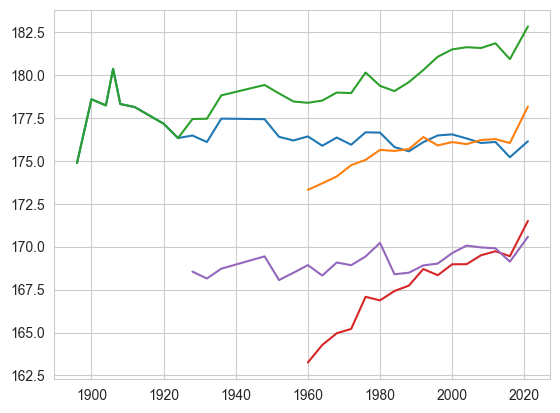

In [34]:
fig1 = plt.plot(media_altura_atletismo.index, media_altura_atletismo)

fig2 = plt.plot(media_altura_desde_1960.index, media_altura_desde_1960)

fig3 = plt.plot(media_altura_atletismo_men.index, media_altura_atletismo_men)

fig4 = plt.plot(media_altura_desde_1960_women.index, media_altura_desde_1960_women)

fig5 = plt.plot(media_altura_atletismo_women.index, media_altura_atletismo_women)

fig6 = plt.plot(media_altura_desde_1960_women.index, y=media_altura_desde_1960_women)

fig2.update_layout(yaxis_range=[160, 185])
# Crear la matriz de subgráficos
fig = make_subplots(rows=2, cols=2)


# Agregar cada gráfico a un subgráfico diferente
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=2, col=1)
fig.add_trace(fig4.data[0], row=2, col=1)

# Fusionar los datos de fig3 y fig4 y agregarlos al subgráfico correspondiente
merged_data = pd.concat([media_altura_atletismo_women, media_altura_desde_1960_women])
fig.add_trace(go.Scatter(x=merged_data.index, y=merged_data, name='Height Mean on Women\'s Athletics & Olympics since 1960'), row=2, col=2)

#fig.update_yaxes(range=[150, 200], row=1, col=1)

# Personalizar la apariencia de la matriz de subgráficos
fig.update_layout(title='Height Comparison', height=400, width=1200)
#fig.update_layout(yaxis_range=[150,200])
fig.update_xaxes(title_text="Height Mean on Athletics", row=1, col=1)
fig.update_xaxes(title_text="Height Mean on Olympics since 1960",row=1,col=2)
fig.update_xaxes(title_text="MvsF Height Mean on Athletics", row=2, col=1)
fig.update_xaxes(title_text="MvsF Height Mean on Olympics since 1960",row=2,col=2)
fig.update_yaxes(range=(165,185))

fig.update_layout(showlegend=False)

fig.show()